In [46]:
#manipulação de dados
import pandas as pd
import numpy as np

#Manipular datas e horários
import datetime as dt

#import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

#Configura a posição dos marcadores de mês ao longo do eixo x em um gráfico que exibe datas
from matplotlib.dates import MonthLocator

#import math
#from scipy import integrate
#import pickle
#import plotly.express as px

In [47]:
df_arq = "C:\\Users\\Sylvia\\OneDrive\\Documentos\\Dados\\Ecoveco_Fisico-quimica_agua_Mensal_Total.xlsx"
dados = pd.read_excel(df_arq)
dados = pd.read_excel(df_arq, sheet_name='Final')
dados['Data'] = pd.to_datetime(dados[['Ano', 'Mês', 'Dia']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
dados = dados.drop(columns = ['Ano','Mês', 'Dia'])
dados.set_index('Data', inplace=True)
dados

,Hora,Site,Temp (°C),Sal (psu),Turbidity (FNU),pH,Secchi,Profundidade
Data,,,,,,,,
2023-01-23,08:38:56,Mangueira,25.5,35.3,15.23,7.88,0.63,0.84
2023-01-23,09:21:20,Museu,26.0,35.4,33.05,8.06,0.44,4.5
2023-01-23,09:36:02,Poste,25.9,35.3,25.88,8.07,0.42,0.74
2023-01-23,10:14:11,Justino,27.7,26.7,6.17,8.64,Bateu no fundo,0.94
2023-01-23,10:54:52,Quitéria,28.0,26.4,8.68,8.34,0.86,1.2
...,...,...,...,...,...,...,...,...
2024-07-04,08:35:33,Vacas,11.4,0.1,12.88,6.57,0.6,2
2024-07-04,08:46:06,Quitéria,11.5,0.1,11.65,6.55,0.8,2.1
2024-07-04,09:02:05,Justino,11.3,0.2,5.35,6.38,0.1,1.9


In [48]:
dados.columns

Index(['Hora', 'Site', 'Temp (°C)', 'Sal (psu)', 'Turbidity (FNU)', 'pH',
       'Secchi', 'Profundidade'],
      dtype='object')

In [49]:
# estatistica descritiva rápida dos dados
dados.describe()

,Temp (°C),Sal (psu),Turbidity (FNU),pH
count,116.000000,116.000000,116.000000,116.000000
mean,21.055345,12.319983,16.035517,7.892897
std,5.111281,12.685112,15.731065,0.662829
min,10.500000,0.100000,0.040000,5.850000
25%,17.900000,0.300000,3.780500,7.635000
50%,21.700000,9.400000,11.550000,7.985000
75%,25.700000,26.325000,23.727500,8.302500
max,28.500000,35.400000,76.080000,9.460000


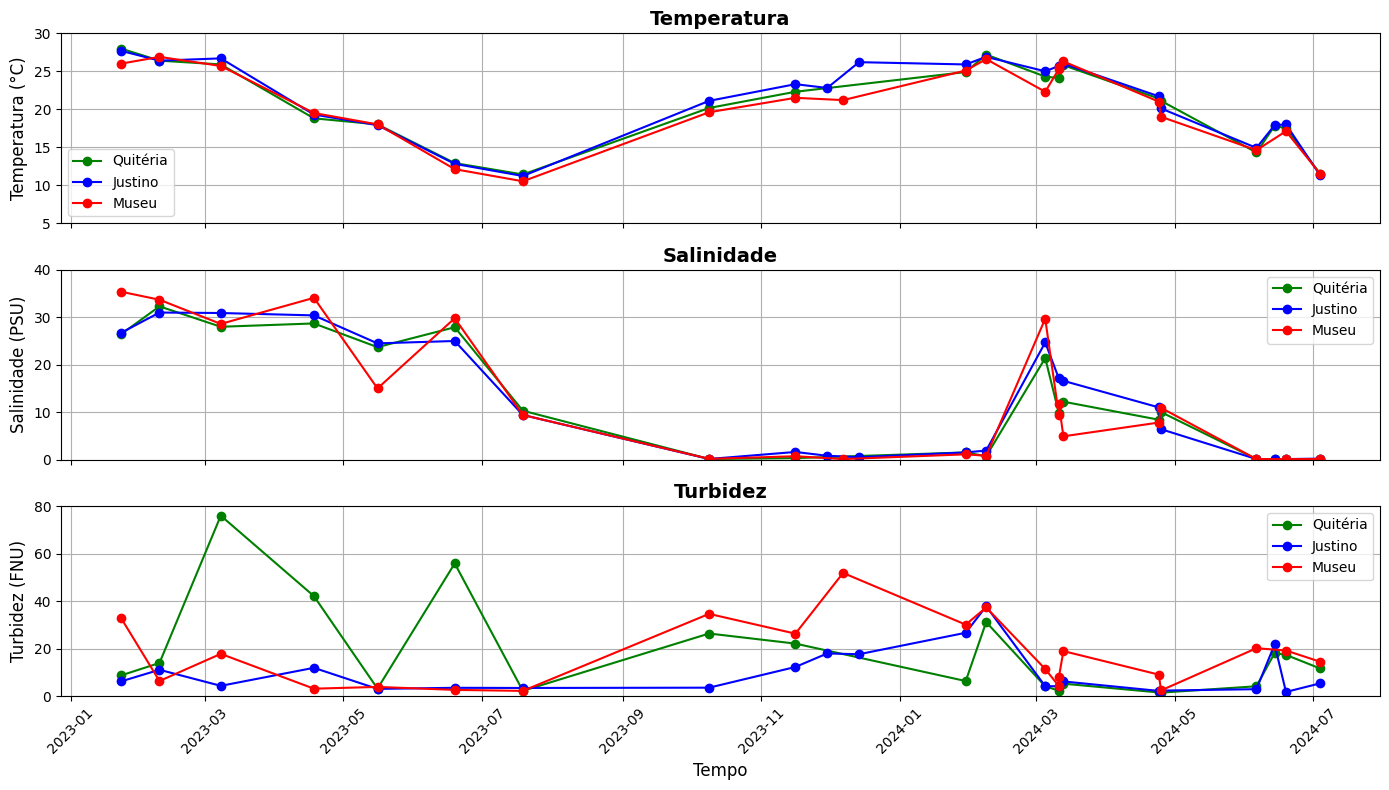

In [50]:
# cria uma figura com 3 subplots dispostos verticalmente (3 linhas e 1 coluna)
fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
locais = ['Quitéria', 'Justino', 'Museu']  # Nomes exatos dos locais
colors = ['g', 'b', 'r']  # Verde, Azul e Vermelho para diferentes locais

# Temperatura...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[0].plot(local_data.index, local_data['Temp (°C)'], marker='o', linestyle='-', label=local, color=color)
axs[0].set_title('Temperatura', fontsize = 14, fontweight = 'bold')
axs[0].set_ylabel('Temperatura (°C)', fontsize = 12), axs[0].set_ylim(5,30)
axs[0].legend(loc = 'lower left'), axs[0].grid(True)

# Salinidade...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[1].plot(local_data.index, local_data['Sal (psu)'], marker='o', linestyle='-', label=local, color=color)
axs[1].set_title('Salinidade', fontsize = 14, fontweight = 'bold')
axs[1].set_ylabel('Salinidade (PSU)', fontsize = 12)
axs[1].set_ylim(0,40), axs[1].legend(), axs[1].grid(True)

# Turbidez...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[2].plot(local_data.index, local_data['Turbidity (FNU)'], marker='o', linestyle='-', label=local, color=color)
axs[2].set_title('Turbidez', fontsize = 14, fontweight = 'bold')
axs[2].set_ylabel('Turbidez (FNU)', fontsize = 12), axs[2].set_ylim(0,80)
axs[2].legend(), axs[2].grid(True)
axs[2].set_xlabel('Tempo', fontsize = 12)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico em uma pasta específica
plt.savefig('Graficos\Dados_Sonda.png', bbox_inches='tight', dpi= 700)
plt.show()

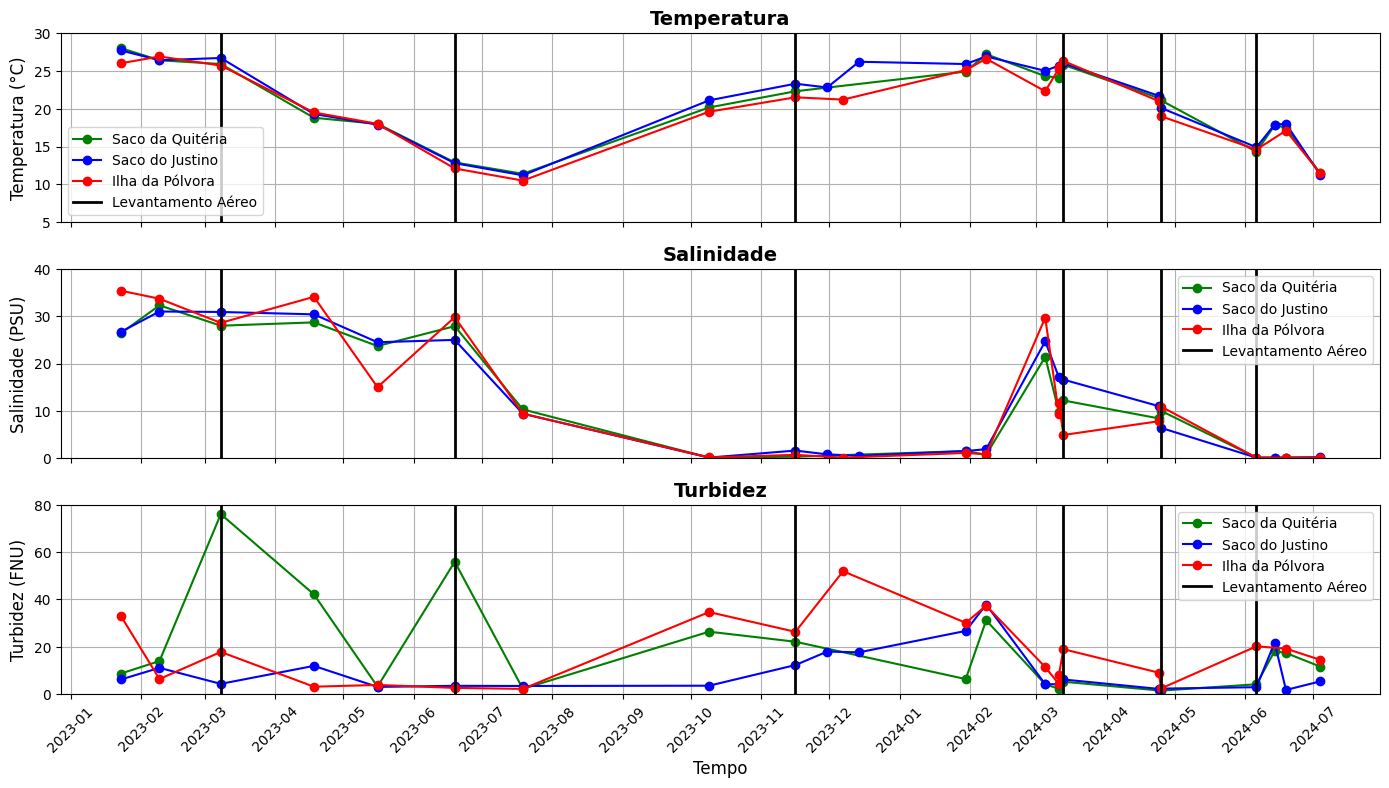

In [53]:
# Criar um DataFrame com as datas de saídas de campo
saidas_campo = pd.to_datetime(['2023-03-08','2023-06-19','2023-11-16','2024-03-13','2024-04-25', '2024-06-06'])

# Dicionário de mapeamento dos nomes antigos para os novos
nome_map = {
    'Quitéria': 'Saco da Quitéria',
    'Justino': 'Saco do Justino',
    'Museu': 'Ilha da Pólvora'
}

# Criar uma figura com 3 subplots dispostos verticalmente (3 linhas e 1 coluna)
fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
locais = ['Quitéria', 'Justino', 'Museu']  # Nomes exatos dos locais
colors = ['g', 'b', 'r']  # Verde, Azul e Vermelho para diferentes locais
            
# Temperatura...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[0].plot(local_data.index, local_data['Temp (°C)'], marker='o', linestyle='-', label=nome_map[local], color=color)
axs[0].set_title('Temperatura', fontsize = 14, fontweight = 'bold')
axs[0].set_ylabel('Temperatura (°C)', fontsize = 12), axs[0].set_ylim(5,30)
axs[0].legend(loc = 'lower right'), axs[0].grid(True)

# Salinidade...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[1].plot(local_data.index, local_data['Sal (psu)'], marker='o', linestyle='-', label=nome_map[local], color=color)
axs[1].set_title('Salinidade', fontsize = 14, fontweight = 'bold')
axs[1].set_ylabel('Salinidade (PSU)', fontsize = 12)
axs[1].set_ylim(0,40), axs[1].legend(), axs[1].grid(True)

# Turbidez...
for local, color in zip(locais, colors):
    local_data = dados[dados['Site'] == local]
    axs[2].plot(local_data.index, local_data['Turbidity (FNU)'], marker='o', linestyle='-', label=nome_map[local], color=color)
axs[2].set_title('Turbidez', fontsize = 14, fontweight = 'bold')
axs[2].set_ylabel('Turbidez (FNU)', fontsize = 12), axs[2].set_ylim(0,80)
axs[2].legend(), axs[2].grid(True)
axs[2].set_xlabel('Tempo', fontsize = 12)

# Adicionando linhas nas saídas de campo
for ax in axs:
    for ponto_destaque in saidas_campo:
        ax.axvline(ponto_destaque, color='black', linestyle='-', linewidth=2)

# Ajustando a legenda para incluir 'Levantamento Aéreo' apenas uma vez
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

# Adicionar a linha do 'Levantamento Aéreo' apenas uma vez
line_handle = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2)
unique_labels['Levantamento Aéreo'] = line_handle
for ax in axs:
    ax.legend(unique_labels.values(), unique_labels.keys(), loc='best')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MonthLocator())  # Locator para mostrar os marcadores de mês em mês

# Ajustando o layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Salvar o gráfico em uma pasta específica
plt.savefig('Graficos\Dados_Sonda_Plot.png', bbox_inches='tight', dpi= 700)
plt.show()